# Main objective: Assessing OLST performance

###### In this script, we are using unsupervied machine learning to assess the performance of the One Leg Balance Test. For input metric, it is a N raws * 128 columns dataframe. The input parameters include different features during One Leg Balance Test trail such as 
* 1.	Lifting forefoot or heel  
* 2.   Moving hip into more than 30 degrees of flexion or abduction  
* 3.	Stepping, stumbling, or falling 
* 4.	Lifting hands off iliac crests


## Step 1: Load and create the dataset

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
### Direct to the correct folder
path = 'C:/Users/a1003/OneDrive/桌面/Thesis/data/OLBT/sub1to31'
filenames = os.listdir(path)   ### List the files name in the folder
sub_id = []                    ### Initialize the subject name list
value_list = []               ### Initialzie the value list

### Organize the information into different list and then integrate them together as a dataframe
for sub in filenames:
    curr_file = path + '/' + sub
    curr_csv = pd.read_csv(curr_file)
    value = list(curr_csv.loc[0])
    value_list.append(value)
    ID = str(curr_csv["sub_ID"][0]) ### -25: sub0?, -4: remove .csv
    sub_id.append(ID)
            
print("Current subject number: " + str(len(sub_id)) + '\n' + "Current features number: " + str(len(value)))

Current subject number: 50
Current features number: 39


In [3]:
### Create the correct columns name
col_names = list(curr_csv.columns)
all_col_names = ["sub_ID"] + col_names

In [4]:
### Create the correct metrix which is going to be convert to dataframe
all_list = []
for i in range(len(sub_id)):
    v = [(sub_id[i])] + value_list[i]
    all_list.append(v)

In [5]:
### Use the list and metrix above the create a new table
raw_df = pd.DataFrame(all_list, columns = all_col_names)
raw_df.columns = ['sub_ID', 'SL_fore_var_height', 'SL_heel_var_height',
       'OL_fore_var_height', 'OL_heel_var_height', 'SL_fore_mean_height',
       'SL_heel_mean_height', 'OL_fore_mean_height', 'OL_heel_mean_height',
       'SL_fore_max_height', 'SL_heel_max_height', 'OL_fore_max_height',
       'OL_heel_max_height', 'SL_var_flex', 'OL_var_flex', 'SL_mean_flex',
       'OL_mean_flex', 'SL_max_flex', 'OL_max_flex', 'SL_duration_flex',
       'OL_duration_flex', 'SL_var_abd', 'OL_var_abd', 'SL_mean_abd',
       'OL_mean_abd', 'SL_max_abd', 'OL_max_abd', 'SL_duration_abd',
       'OL_duration_abd', 'stepping_freq', 'stepping_duration', 'var_RL_dis',
       'Max_min_RL_dis', 'sub', 'foot_height_count', 'angle_count',
       'stepping_count', 'hand_iliac_count', 'out_position_count', 'totel']
NL_df = raw_df.drop(["sub"], axis = 1)
AM_df = raw_df.iloc[:, 33:]

In [6]:
#AM_df.to_csv("C:/Users/a1003/OneDrive/桌面/Thesis/excel_csv/new_assessment/automated_system_assessment.csv")

## Step 2: Preprocessing the data

* Missing data

In [7]:
### fill the missing data with average
df = NL_df.copy()
df_without_na = df.iloc[:,1:].copy()
for col in NL_df.columns:
    if df[col].isna().sum() != 0:
        df_without_na[col] = df_without_na[col].fillna(df[col].mean())
print("Amount of nan in original table: " + str(df.isna().sum().sum()) + '\n' + "Amount of nan in current table: " + str(df_without_na.isna().sum().sum()))

Amount of nan in original table: 0
Amount of nan in current table: 0


In [18]:
df_without_na

,SL_fore_var_height,SL_heel_var_height,OL_fore_var_height,OL_heel_var_height,SL_fore_mean_height,SL_heel_mean_height,OL_fore_mean_height,OL_heel_mean_height,SL_fore_max_height,SL_heel_max_height,...,stepping_freq,stepping_duration,var_RL_dis,Max_min_RL_dis,foot_height_count,angle_count,stepping_count,hand_iliac_count,out_position_count,totel
0,0.194268,0.132739,2.560450,3.288880,3.58800,2.36645,10.40550,24.15240,4.28373,2.84152,...,0,0,0.359160,2.06700,0,0,0,4,0,4
1,0.083899,0.073868,2.484520,2.726320,3.49694,2.20640,11.23560,26.67700,4.09360,2.42147,...,0,0,0.141130,0.89178,0,0,0,1,0,1
2,0.340049,0.132048,6.954940,7.842340,3.26082,2.48081,24.35150,40.76890,4.49678,3.09643,...,5,1699,4.190300,55.85950,4,3,5,1,0,13
3,0.149411,0.071539,2.811100,2.781430,3.25182,2.45036,28.58170,45.42230,3.83641,2.67324,...,0,0,0.182490,1.10830,0,0,0,0,0,0
4,0.283660,0.087860,5.789480,9.195850,3.88335,2.77870,18.13190,34.36920,5.63182,3.67580,...,5,2891,0.964010,4.54240,2,4,5,0,0,11
5,0.157358,0.032078,3.442320,3.778670,3.79353,2.70992,23.35820,41.88280,4.88048,2.76883,...,0,0,0.243870,3.59390,1,0,0,1,0,2
6,0.135562,0.066386,2.680900,1.349240,3.30217,2.41177,17.37570,30.80630,4.14211,2.72180,...,0,0,0.123680,0.72209,0,0,0,6,0,6
7,0.096802,0.026074,2.950020,3.502280,3.33044,2.35415,26.67340,43.80910,3.98270,2.48760,...,0,0,0.067221,0.48152,0,0,0,0,0,0
8,0.284034,0.148888,6.829790,9.159850,4.58791,2.93285,11.06340,19.96540,6.07109,4.90739,...,19,11700,2.807930,41.15890,5,4,6,3,0,18
9,0.170792,0.071434,1.476800,2.258240,4.60131,2.88247,11.14430,24.18600,5.72959,3.13712,...,0,0,0.437840,3.81820,0,0,0,3,0,3


In [8]:
### normalize the dataset
from sklearn import preprocessing

normalized_df = pd.DataFrame()
for col in df_without_na.columns[:]:
    normalized_df[col] = preprocessing.normalize(np.array(df_without_na[col]).reshape(1, -1))[0]

In [19]:
scaler = preprocessing.StandardScaler()
standardized_df = scaler.fit_transform(df_without_na)

In [20]:
#normalized_df

## Step 3: Feature selection

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [22]:
pca = PCA(n_components = 0.95)

In [23]:
pca.fit(normalized_df)


PCA(n_components=0.95)

In [24]:
pca.components_.shape

(12, 38)

In [25]:
#plt.plot(pca.components_[0])


In [26]:
#pca.components_

In [27]:
pca_normalized_df = pca.fit_transform(normalized_df)
pca_df_without_na = pca.fit_transform(df_without_na.iloc[:,1:])

In [28]:
pca_normalized_df.shape
### importance of the parameter

(50, 12)

## Step 4: Train and testing the model

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [30]:
#normalized_df = np.array(normalized_df)
#normalized_df

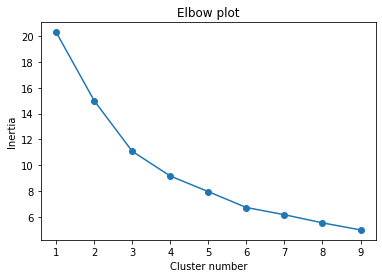

In [56]:
# pca_normalized_df 
# normalized_df 
# df_without_na.iloc[:,1:] (not normalized)
# pca_df_without_na  (not normalized)
x_train = normalized_df
inertia = []
for cluster in range(1,10):
    km = KMeans(n_clusters=cluster, random_state=0).fit(x_train)
    iner = km.inertia_
    inertia.append(iner)
plt.plot(range(1,10), inertia)
plt.title("Elbow plot")
plt.xlabel("Cluster number")
plt.ylabel("Inertia")
plt.scatter(range(1,10), inertia)

In [57]:
km_3 = KMeans(n_clusters=3, random_state=0).fit(x_train)
centers = km_3.cluster_centers_
labels = km_3.labels_

In [61]:
pd.set_option('display.max_rows', 100)
df_3 = pd.DataFrame({"Sub": sub_id, "Labels":labels})
df_3['Labels'] = df_3['Labels'].replace({0:'Moderate', 2:'Bad', 1:'Good'})
df_3_sorted = df_3.sort_values('Sub')

In [62]:
df_3_sorted.to_csv("Automated_compared_df.csv")

In [63]:
df_3_sorted

,Sub,Labels
0,sub_01_EC_W2,Good
1,sub_01_EP_W2,Good
2,sub_02_EC_W2,Bad
3,sub_02_EP_W2,Good
4,sub_03_EC_W2,Bad
5,sub_03_EP_W2,Good
6,sub_04_EC_W2,Good
7,sub_04_EP_W2,Good
8,sub_05_EC_W2,Bad
9,sub_05_EP_W2,Good


## Step 4: Evaluate the model

In [64]:
target_df = pd.read_csv("C:/Users/a1003/OneDrive/桌面/Thesis/assessing/OLBT_evaluation_sheet.csv") 

In [65]:
target_df = target_df[["sub_ID", "overall_rate"]]
#target_df

In [66]:
Automated_compared_df = df_3_sorted[(df_3_sorted['Sub'].isin(target_df['sub_ID']))].reset_index(drop=True)
Comparison_sorted_df = target_df[(target_df['sub_ID'].isin(Automated_compared_df['Sub']))].reset_index(drop=True)

In [67]:
comb_df_list = [Automated_compared_df, Comparison_sorted_df['overall_rate']]

In [68]:
comparison_df = pd.concat(comb_df_list, axis = 1)
comparison_df.columns = ['Sub', 'prediction', 'Target']

In [69]:
comparison_df

,Sub,prediction,Target
0,sub_01_EC_W2,Good,Good
1,sub_01_EP_W2,Good,Good
2,sub_02_EC_W2,Bad,Bad
3,sub_02_EP_W2,Good,Good
4,sub_03_EC_W2,Bad,Bad
5,sub_03_EP_W2,Good,Good
6,sub_04_EC_W2,Good,Good
7,sub_04_EP_W2,Good,Good
8,sub_05_EC_W2,Bad,Bad
9,sub_05_EP_W2,Good,Moderate


## Accuracy

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [71]:
acc_3_t = accuracy_score(comparison_df['Target'], comparison_df['prediction'])
cm_3_t = confusion_matrix(comparison_df['Target'], comparison_df['prediction'])
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("acc: " + str(acc_3_t) + "\n" + "recall: " + str(recall_3_t) + "\n" + "precision: " + str(precision_3_t))

acc: 0.7346938775510204
recall: 0.6436781609195402
precision: 0.6378066378066378


## Confusion Matrix

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

* 3_clusters_model

In [73]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
transform_cm =confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]

Text(0.5, 1.0, 'Kmeans confusion matrix')

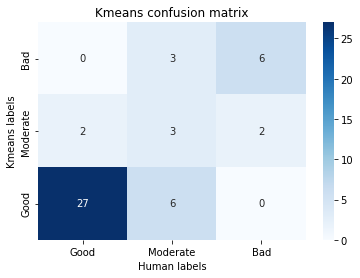

In [74]:
#labels = comparison_df['prediction'].unique()

cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Kmeans labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("Kmeans confusion matrix")

#### Sensitivity

In [75]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Kmeans Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Kmeans Sensitivity: 
 Good prediction: 93.10344827586206 
 Moderate prediction 25.0 
 Bad prediction 75.0


#### Precision (true predictive rate)

In [76]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Hardcoded Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Hardcoded Precision: 
 Good prediction: 81.81818181818183 
 Moderate prediction 42.857142857142854 
 Bad prediction 66.66666666666666


## save model

In [77]:
#import pickle

In [78]:
#pickle.dump(km_3, open("km_3_20062022.pkl", "wb"))

In [79]:
# load the model
# model = pickle.load(open("model.pkl", "rb"))

In [80]:
#comparison_df["Target"].to_csv("SL_target.csv")